<a href="https://colab.research.google.com/github/svperbeast/ai_lab/blob/main/Optimization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [1]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example
## Numerical Example

$$3(1-x_1)^2 e^{-x_1^2-(x_2+1)^2}-10(\frac{x_1}{5}-x_1^3-x_2^5)e^{-x_1^2-x_2^2}-\frac{1}{3} e^{-(x_1+1)^2-x_2^2}$$

$$x^* = (0.2283,-1.6256), f(x^*)=-6.5511$$

In [2]:
def f(x1,x2):
    return 3*((1-x1)**2)*np.exp(-x1**2-(x2+1)**2)-10*(x1/5-x1**3-x2**5)*np.exp(-x1**2-x2**2)-1/3*np.exp(-(x1+1)**2-x2**2)

x1 = np.linspace(-3,3,50)
x2 = np.linspace(-3,3,50)

X1, X2 = np.meshgrid(x1,x2)
Y = f(X1,X2)

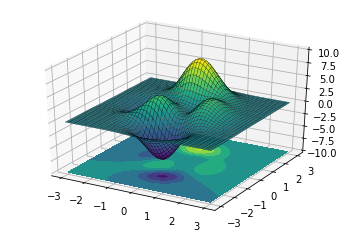

In [3]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y,
                cmap='viridis', edgecolor='black', linewidths=0.2)
cset = ax.contourf(X1, X2, Y, zdir='z', offset=-10, cmap='viridis')
ax.set_zlim(-10, 10)
ax.view_init(elev=30., azim=-60)

In [4]:
f(0.2283,-1.6256)

-6.5511332622988725

## Numerical Optimization
+ Recall the definitions of first and second derivatives and numerically find those just for convenience.

$$f'(x)=\lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$

$$f''(x)=\lim_{h \to 0} \frac{f'(x)-f'(x-h)}{h}$$

+ In multi-dimensional case, use the definitions of partial derivatives.

In [5]:
def f(X):
    return 3*((1-X[0])**2)*np.exp(-X[0]**2-(X[1]+1)**2)-10*(X[0]/5-X[0]**3-X[1]**5)*np.exp(-X[0]**2-X[1]**2)-np.exp(-(X[0]+1)**2-X[1]**2)/3

def grad(myfun, x, eps):
    p = len(x)
    derv = np.zeros_like(x,dtype='float32')
    for i in range(p):
        nx = x.copy()
        nx[i] = nx[i]+eps
        derv[i] = (myfun(nx)-myfun(x))/eps
    return derv

def hess(myfun, x, eps):
    p = len(x)
    H_mat = np.empty([p,p])
    for i in range(p):
        for j in range(p):
            nxi = x.copy()
            nxi[i] = nxi[i] + eps
            
            nxj = x.copy()
            nxj[j] = nxj[j] + eps
            
            nxij = nxi.copy()
            nxij[j] = nxij[j] + eps
            
            H_mat[i,j] = ( (myfun(nxij)-myfun(nxj))/eps - (myfun(nxi)-myfun(x))/eps ) / eps
    return(H_mat)

## Gradient Decent Method

In [12]:
h = 0.000001
rate = 0.01

# gradient decent
iteration = 50
xstar = np.empty([iteration+1,2])
xstar[0,:] = [1.2,-0.5]
y_val = [f(xstar[0,:])]

for t in range(iteration):
    xstar[t+1,:] = xstar[t,:] - grad(f,xstar[t,:],h)*rate
    y_val.append(f(xstar[t+1,:]))

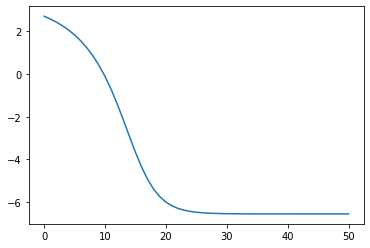

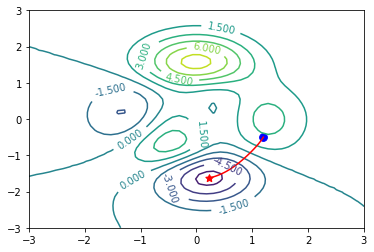

In [13]:
plt.plot(y_val)
plt.show()

x1 = np.linspace(-3,3,50)
x2 = np.linspace(-3,3,50)

X = np.array(np.meshgrid(x1,x2)).reshape(2,50*50).T
Y = np.array([f(x) for x in X]).reshape(50,50)

fig, ax = plt.subplots()
CS = ax.contour(x1, x2, Y,levels=10)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(xstar[:,0],xstar[:,1],c='r')
ax.scatter(xstar[0,0],xstar[0,1],c='b',s=60)
ax.scatter(xstar[-1,0],xstar[-1,1],marker=(5, 1),c='r',s=60)
fig.show()

## Newton Direction


In [10]:
h = 0.000001

# gradient decent
iteration = 20
xstar = np.empty([iteration+1,2])
xstar[0,:] = [0,-1.3]
y_val = [f(xstar[0,:])]

for t in range(iteration):
    xstar[t+1,:] = xstar[t,:] - np.linalg.inv(hess(f,xstar[t,:],h)).dot(grad(f,xstar[t,:],h))
    y_val.append(f(xstar[t+1,:]))

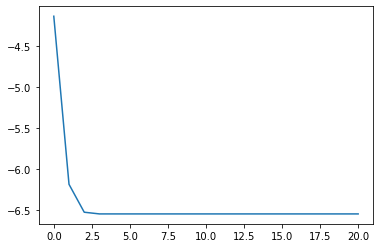

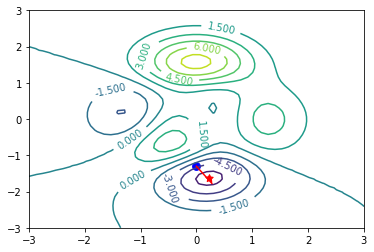

In [11]:
plt.plot(y_val)
plt.show()

x1 = np.linspace(-3,3,50)
x2 = np.linspace(-3,3,50)

X = np.array(np.meshgrid(x1,x2)).reshape(2,50*50).T
Y = np.array([f(x) for x in X]).reshape(50,50)

fig, ax = plt.subplots()
CS = ax.contour(x1, x2, Y,levels=10)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(xstar[:,0],xstar[:,1],c='r')
ax.scatter(xstar[0,0],xstar[0,1],c='b',s=60)
ax.scatter(xstar[-1,0],xstar[-1,1],marker=(5, 1),c='r',s=60)
fig.show()

## Quasi-Newton Method
### Quasi-Newton method is about approximation of inverse Hessian
* Therefore, Quasi-Newton requires only the gradient of the objective to be computed at each iterate.
* Quasi-Newton methods are much faster than gradient descent.
* Since second derivatives (the Hessian) are not required, quasi-Newton methods are sometimes more efficient than Newton methods, especially when Hessian evaluation is slow and expensive.
* The BFGS algorithm is the most popular quasi-Newton method.
    * BFGS is short for Broyden-Fletcher-Goldfarb-Shanno who are the discoverers of the method.


In [14]:
from scipy import optimize

x0 = [1.2,-0.6]
res = optimize.minimize(f,x0,method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -6.551133
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 13


In [15]:
print(res.x)
print(f(res.x))

[ 0.22827891 -1.62553497]
-6.5511333328358345
